## Checking GPU access

In [ ]:
!nvidia-smi

Sat Aug 10 10:34:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Loading Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="IeagtuIjA70Jyzro8NTI")
project = rf.workspace("school-kwzhr").project("pothole-2-ym5pm")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.75, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to POTHOLE-2-1 in yolov8:: 100%|██████████| 16986/16986 [00:04<00:00, 3746.02it/s]


In [ ]:
!pip install split-folders

## Custom Training

In [ ]:
import splitfolders

# Assuming your dataset is in a folder named 'pothole-2-ym5pm' within the 'datasets' directory
input_folder = f"{HOME}/datasets/POTHOLE-2-1/train"
output_folder = f"{HOME}/datasets/POTHOLE-2-1/pothole_split/" # Where you want the split datasets to be saved

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.7, .2, .1)) # Split with an 70-20-10 ratio

Copying files: 16980 files [00:10, 1692.69 files/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/POTHOLE-2-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

# To save Model on Drive (incase runtime disconnected, we loose all our data :() )

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Replace with the actual path to your trained model
model_path = '/content/runs/detect/train6/'
destination_path = '/content/drive/MyDrive/streetspecter/'  # Choose your desired location on Drive

shutil.copy(model_path, destination_path)

## To resume training

In [ ]:
!yolo task=detect mode=train model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True resume

# Stats

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


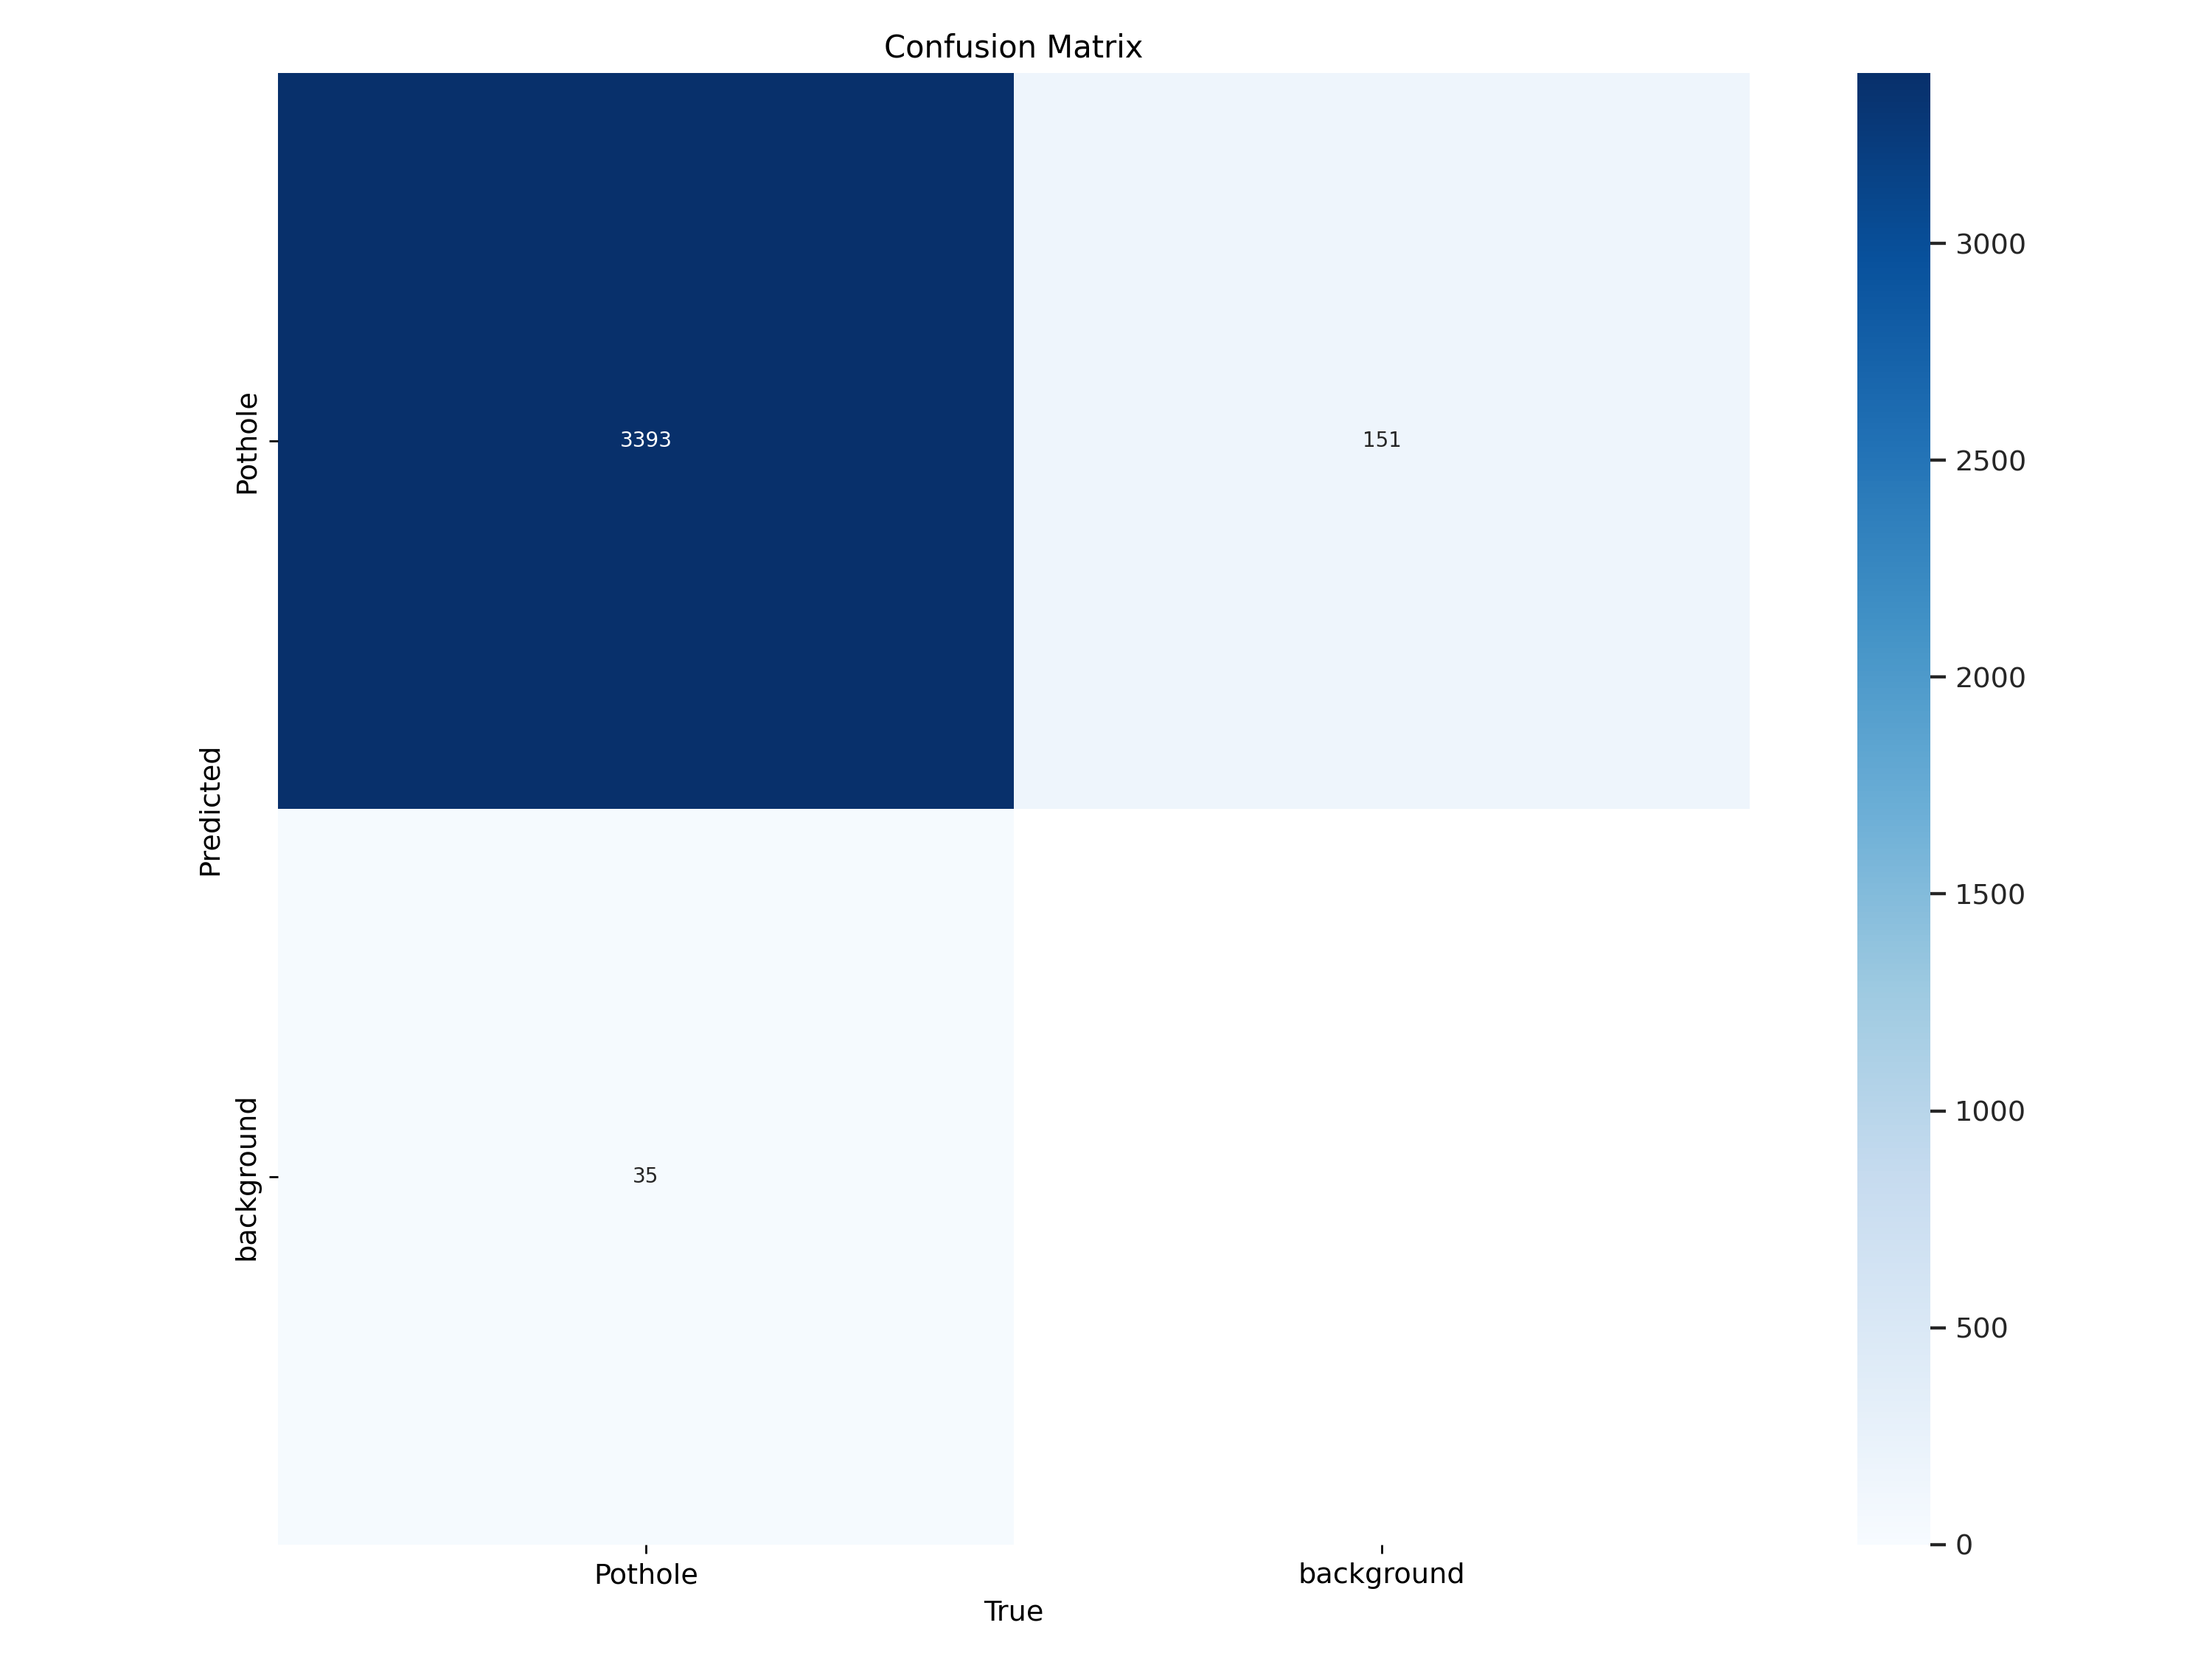

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

/content


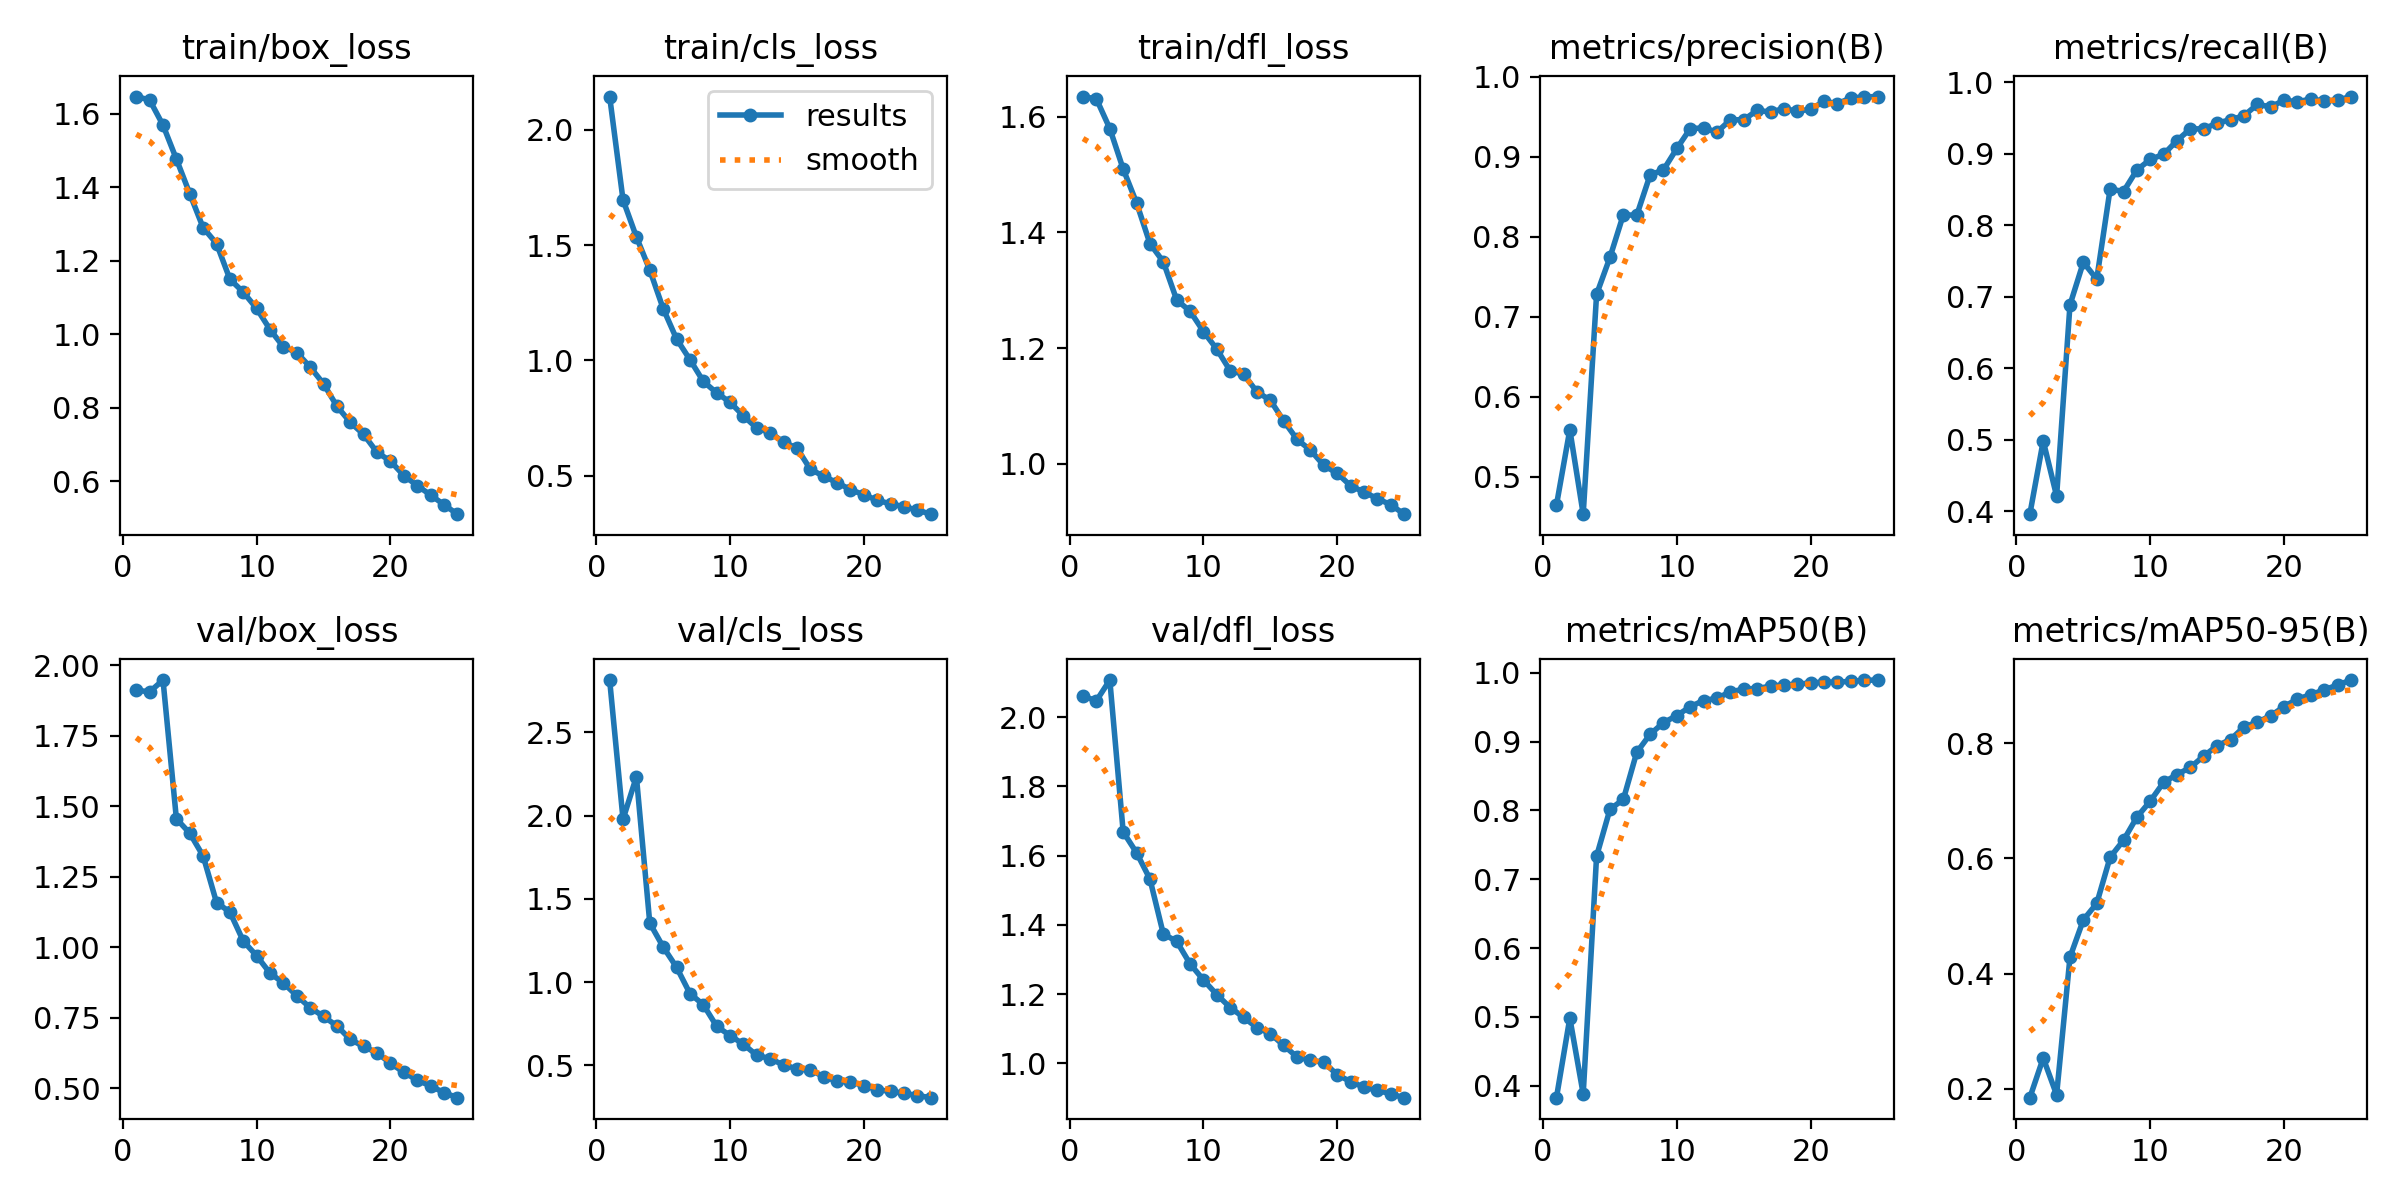

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

/content


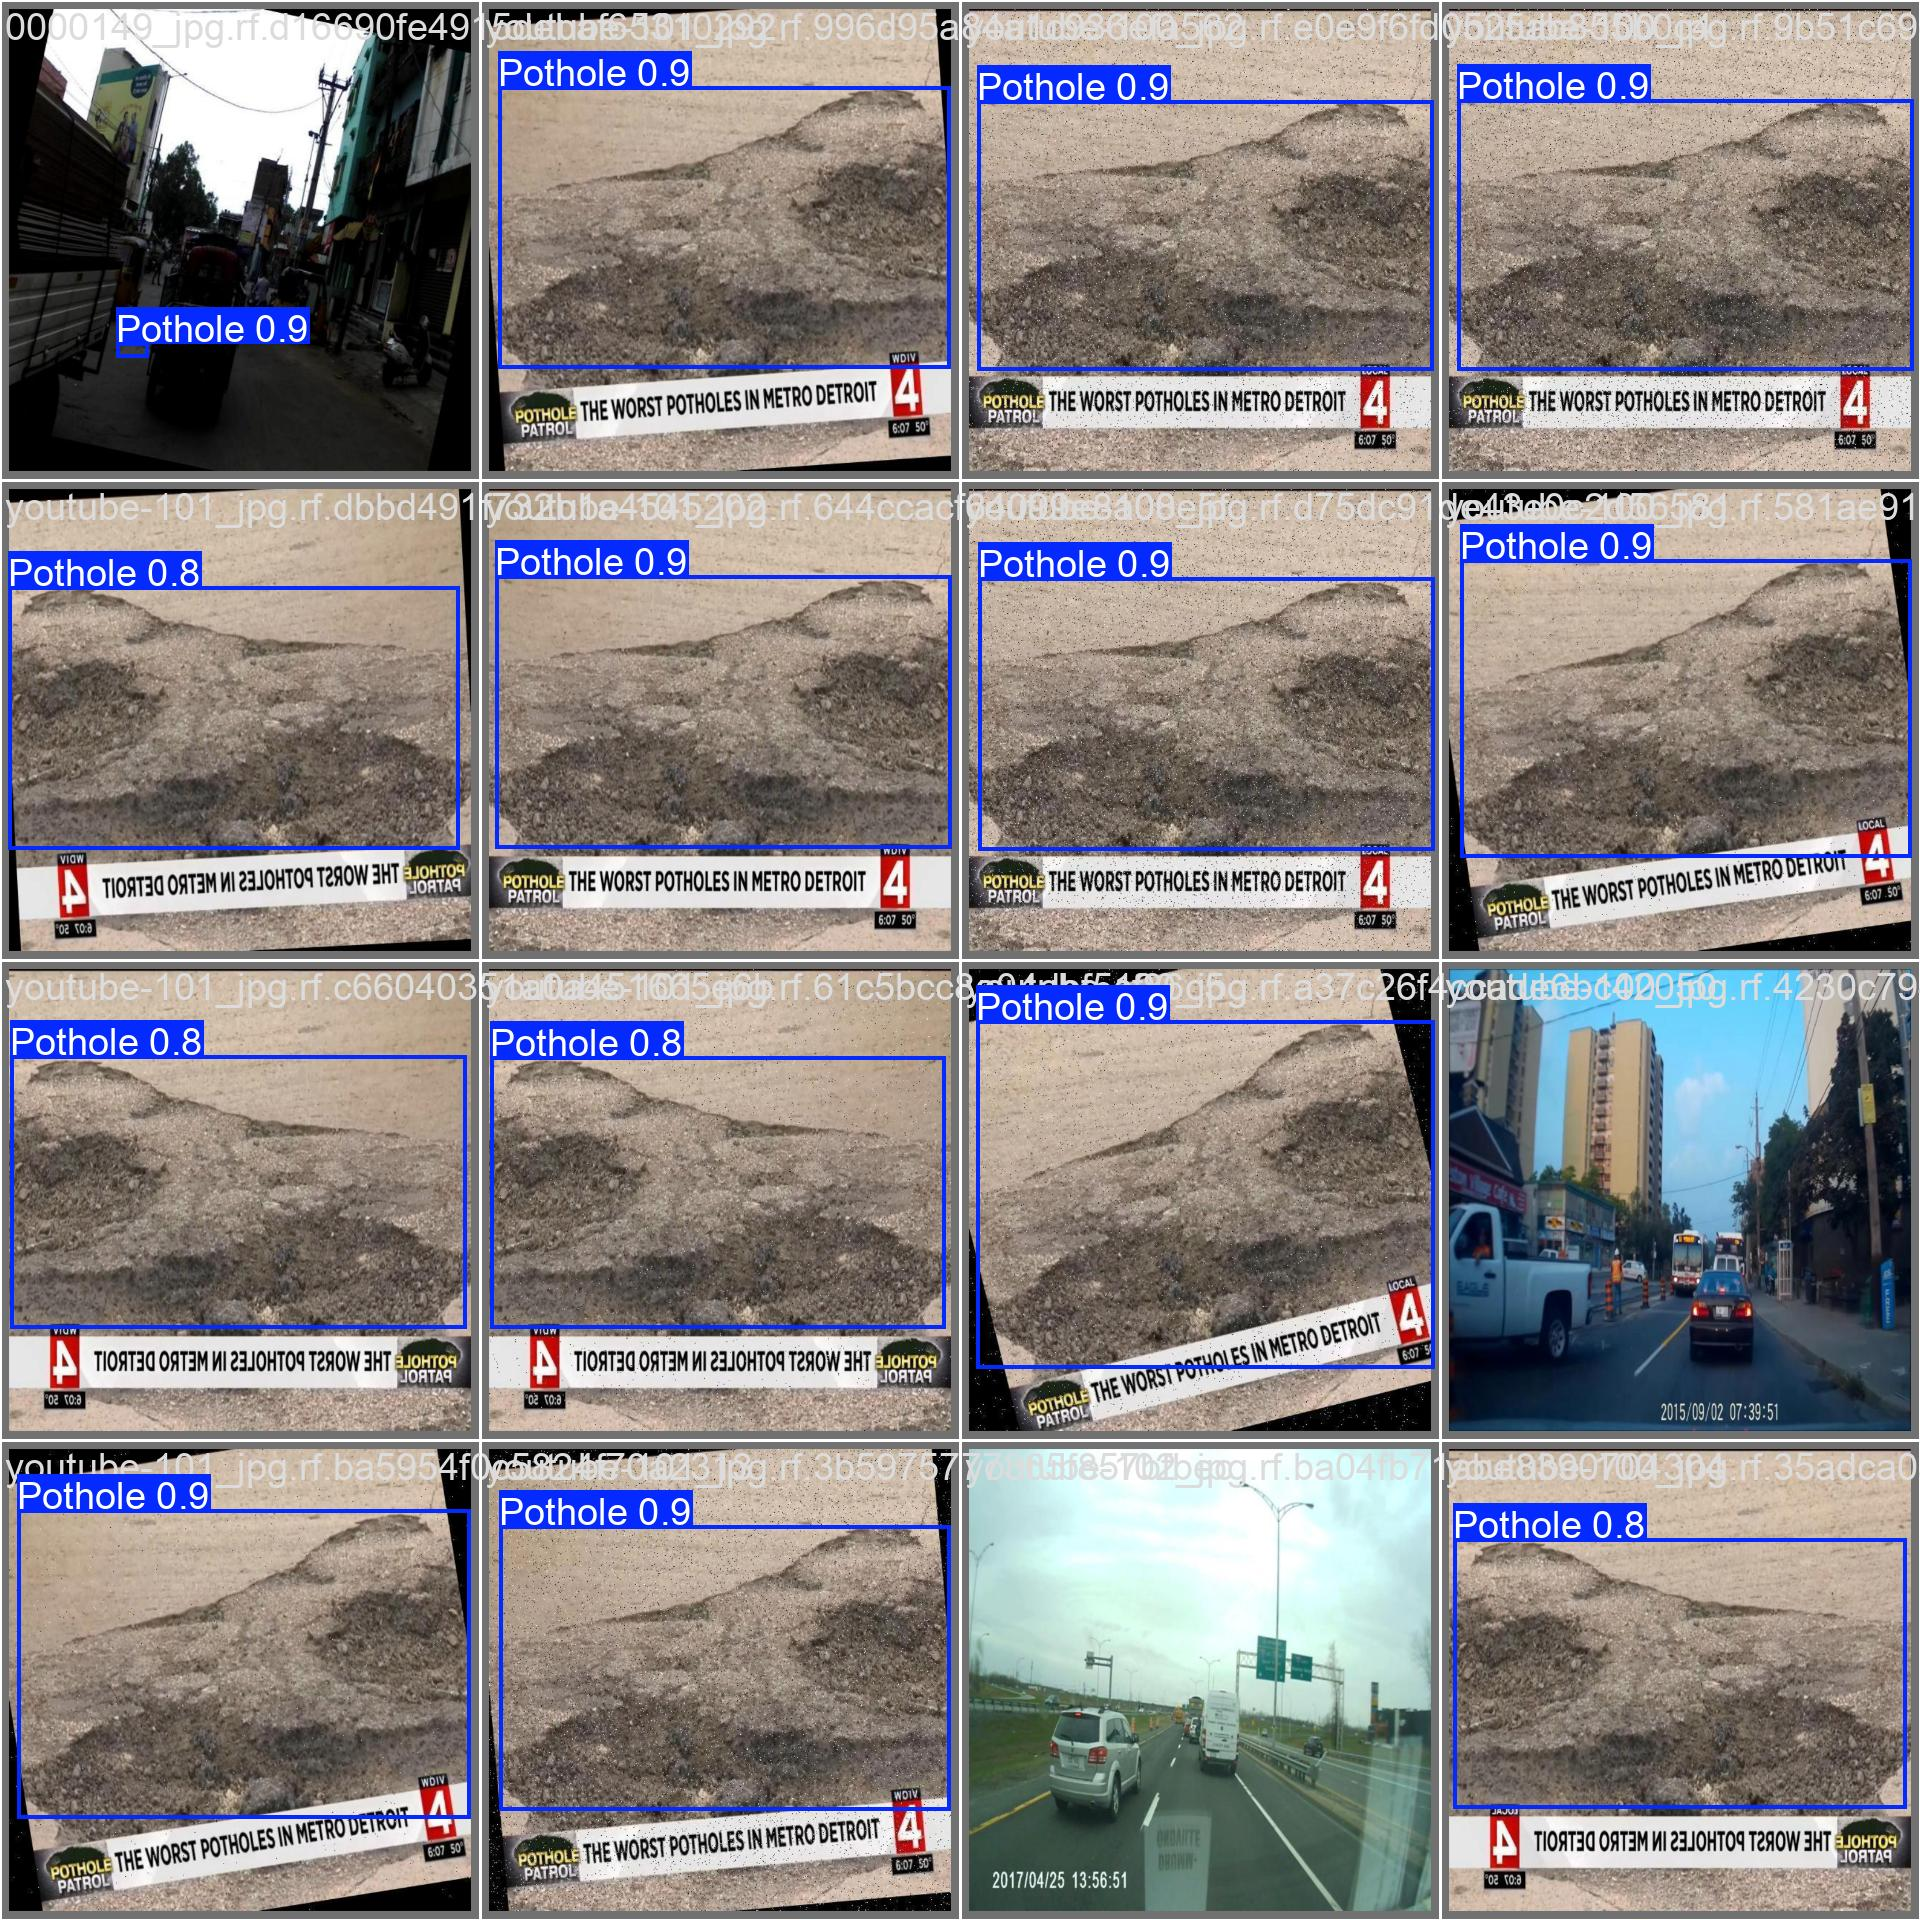

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/POTHOLE-2-1/pothole_split/train/val/labels.cache... 1698 images, 235 backgrounds, 0 corrupt: 100% 1698/1698 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/POTHOLE-2-1/pothole_split/train/val/images/images173_jpg.rf.69a007f8f4eca0ad3993eba1ba7e20fc.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/POTHOLE-2-1/pothole_split/train/val/images/images17_jpg.rf.44b314ca725209c62b1d9340ee9ca2dd.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/POTHOLE-2-1/pothole_split/train/val/images/images17_jpg.rf.9f15bed003076037cb27c98beaba4366.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/POTHOLE-2-1/pothole_split/train/val/images/images194_jpg.rf.e1472e16292491caf86db8640af3b9e3.jpg: 8 duplicate labels removed
val: WARNING ⚠️ /content/datas

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/pothole_split/train/test/images save=True

/content
Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/849 /content/datasets/POTHOLE-2-1/pothole_split/train/test/images/0000149_jpg.rf.223731e61ceb511794affebd996d9739.jpg: 800x800 1 Pothole, 22.5ms
image 2/849 /content/datasets/POTHOLE-2-1/pothole_split/train/test/images/0000149_jpg.rf.b765295fcea087b355b7155b1d6a7664.jpg: 800x800 1 Pothole, 22.6ms
image 3/849 /content/datasets/POTHOLE-2-1/pothole_split/train/test/images/0000149_jpg.rf.deb5062b602dfb0ec67225a768131e80.jpg: 800x800 1 Pothole, 22.5ms
image 4/849 /content/datasets/POTHOLE-2-1/pothole_split/train/test/images/000042_r_jpg.rf.64dc2c64263c142c55aab58cf6624522.jpg: 800x800 1 Pothole, 22.4ms
image 5/849 /content/datasets/POTHOLE-2-1/pothole_split/train/test/images/0000836_jpg.rf.2b67755f637dac1b6ebd0f5aadd679d9.jpg: 800x800 2 Potholes, 22.5ms
image 6/849 /content/datasets/POTHOLE-2-1/pothole_spl

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Deploying Model on Roboflow

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train6/")

Dependency ultralytics==8.0.196 is required but found version=8.2.75, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/school-kwzhr/pothole-2-ym5pm/1/uploadModel?api_key=IeagtuIjA70Jyzro8NTI&modelType=yolov8&nocache=true


In [ ]:
#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred